Considering opening and closing parameters open as X and close as Y

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates
mydata=pd.read_csv("SBIN.csv")


In [5]:
print mydata

            Date    Open    High     Low    Last   Close  \
0      3/20/1998  275.40  278.80  273.30  276.80  276.80   
1      3/23/1998  278.45  280.90  278.45  279.95  279.95   
2      3/24/1998  282.00  288.40  280.00  282.25  284.35   
3      3/25/1998  285.00  290.25  284.50  288.70  289.15   
4      3/26/1998  289.00  289.00  280.10  281.75  281.70   
5      3/27/1998  281.60  285.50  279.90  285.20  285.00   
6      3/30/1998  285.85  287.00  279.10  279.50  279.80   
7      3/31/1998  279.00  282.00  277.25  278.50  278.90   
8       4/1/1998  281.00  287.55  281.00  287.55  286.75   
9       4/2/1998  287.95  289.00  284.50  285.45  285.45   
10      4/3/1998  287.90  293.90  286.10  293.40  291.75   
11      4/6/1998  293.95  295.80  290.70  293.20  292.70   
12      4/7/1998  292.45  302.20  291.00  302.20  298.60   
13      4/9/1998  307.00  308.50  299.15  302.70  302.50   
14     4/10/1998  301.20  306.00  299.30  301.70  301.45   
15     4/13/1998  300.70  300.70  290.05

In [6]:
mydata_x=mydata['Open'].values
mydata_y=mydata['Close'].values


In [7]:
type(mydata_x)

numpy.ndarray

In [8]:
type(mydata_y)

numpy.ndarray

In [9]:
#splitting the data into two sets training and testing dataset
stock_x_train=mydata_x[:-20]
stock_x_test=mydata_x[-20:]

In [10]:
#splitting the target into training and testing dataset
stock_y_train=mydata_y[:-20]
stock_y_test=mydata_y[-20:]

In [11]:
#creating the linear regression object
regr=linear_model.LinearRegression()
#reshaping to remove depreciation error
stock_x_train=stock_x_train.reshape(-1,1)
stock_y_train=stock_y_train.reshape(-1,1)

In [12]:
regr.fit(stock_x_train,stock_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
len(stock_x_train)

4691

In [14]:
len(stock_y_train)

4691

In [15]:
print("Coefficient is ",regr.coef_)

('Coefficient is ', array([[ 0.99807296]]))


In [16]:
stock_x_test=stock_x_test.reshape(-1,1)
stock_y_test=stock_y_test.reshape(-1,1)

In [17]:
#mean square error, it should be closer to zero for a good condition
print("Mean squared error: %.2f" % np.mean((regr.predict(stock_x_test) - stock_y_test) ** 2))

Mean squared error: 13.09


In [18]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(stock_x_test, stock_y_test))

Variance score: 0.84


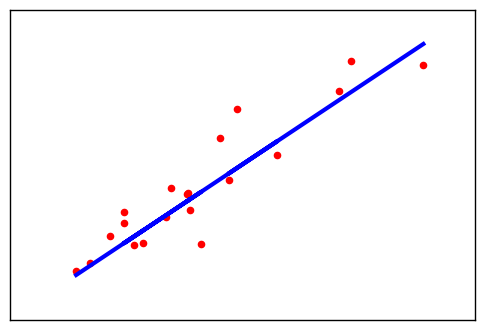

In [19]:
#plotting the output
plt.scatter(stock_x_test, stock_y_test, color='red')
plt.plot(stock_x_test,regr.predict(stock_x_test),color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()